<a href="https://colab.research.google.com/github/hachristina/food-sales-prediction/blob/main/Food_Sales_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp/Project 1: Food Sales Prediction/sales_predictions.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Time to clean the file

For Part 2, your task is to  use Pandas to start cleaning and exploring the data. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step! First, clone the GitHub repo you created to house your project so you are able to commit your work to this repository. See the video at the end of this assignment if you are unsure of how to do this.

Your data should already be loaded into your notebook from part 1 of the project.
Explore the data - what do you need to do to clean this data? Clean it!  
Be sure to address each of the following 8 tasks

In [11]:
#1) How many rows and columns?
df.shape

(8523, 12)

In [4]:
#2) What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated().any()

False

In [6]:
#4) Identify missing values.
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
#missing values in Item_Weight and Outlet_size

#MISSING ITEM_WEIGHT
null_item_weight = pd.isnull(df['Item_Weight'])
null_item_weight_filter = df.loc[null_item_weight]
null_item_weight_filter

year_filter = df["Outlet_Establishment_Year"] == 1985
df[year_filter].describe()
#the Item_Weight values are missing when Outlet_Establishment_Year == 1985 (1463 total missing weight values)

df['Item_Identifier'].value_counts()

#sorting the dataframe by Item Identifier and Outlet Establishment Year so we can grab the missing item weights from the nearby rows
df.sort_values(by=['Item_Identifier', 'Outlet_Establishment_Year'], ascending=False, inplace=True)
df.head(50)

#filling in the missing values with the nearby row
df.loc[:, 'Item_Weight'].fillna(method='ffill', inplace=True)


#MISSING OUTLET SIZES

df.loc[:, 'Outlet_Identifier'].value_counts()
#OUT027 - Medium - Tier 3 - Supermarket Type 3
#OUT013 - Large - Tier 3 - Supermarket Type 1
#OUT049 - Medium - Tier 1 - Supermarket Type 1
#OUT046 - Small - Tier I - Supermarket Type1
#OUT035 - Small - Tier 2 - Supermarket Type1
#OUT045 - NaN - Tier 2 - Supermarket Type 1
#OUT018 - Medium - Tier 3 - Supermarket Type2
#OUT017 - NaN  - Tier 2 - Supermarket Type 1
#OUT010 - NaN - Tier 3 - Grocery Store
#OUT019 - Small - Tier 1 - Grocery Store


outlet_location_filter1 = df["Outlet_Location_Type"] == "Tier 1"
outlet_location_filter2 = df["Outlet_Location_Type"] == "Tier 2"
outlet_location_filter3 = df["Outlet_Location_Type"] == "Tier 3"


outlet_type_filter1 = df["Outlet_Type"] == "Supermarket Type1"
outlet_type_filter2 = df["Outlet_Type"] == "Supermarket Type2"
outlet_type_filter3 = df["Outlet_Type"] == "Supermarket Type3"
outlet_type_filter4 = df["Outlet_Type"] == "Grocery Store"



#Missing Outlet_Size for OUT045 and OUT017
#turning these missing values into "Small" because the other Tier 2, Supermarket Type1 store is small. 

df.loc[outlet_location_filter2 & outlet_type_filter1 & (df['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'
df[df['Outlet_Identifier'] == "OUT045"]

#Missing Outlet_Size for OUT010
#turning these missing values into "Medium" because the other Tier 3 stores are Medium
df.loc[outlet_location_filter3 & outlet_type_filter4 & (df['Outlet_Size'].isna()), 'Outlet_Size'] = 'Medium'
df[df['Outlet_Identifier'] == "OUT010"]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
214,NCZ54,14.650,Low Fat,0.000000,Household,161.5552,OUT010,1998,Medium,Tier 3,Grocery Store,324.9104
4924,NCZ53,9.600,Low Fat,0.040970,Health and Hygiene,188.7214,OUT010,1998,Medium,Tier 3,Grocery Store,376.8428
411,NCZ42,10.500,Low Fat,0.000000,Household,238.3248,OUT010,1998,Medium,Tier 3,Grocery Store,711.0744
1224,NCZ30,6.590,Low Fat,0.043828,Household,121.4098,OUT010,1998,Medium,Tier 3,Grocery Store,241.0196
8054,NCZ29,15.000,Low Fat,0.119461,Health and Hygiene,126.3362,OUT010,1998,Medium,Tier 3,Grocery Store,503.3448
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,DRB25,12.300,Low Fat,0.116261,Soft Drinks,107.0938,OUT010,1998,Medium,Tier 3,Grocery Store,214.3876
2479,DRB13,6.115,Regular,0.011791,Soft Drinks,189.0530,OUT010,1998,Medium,Tier 3,Grocery Store,948.7650
8371,DRA59,8.270,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,Medium,Tier 3,Grocery Store,185.0924
4130,DRA24,19.350,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,Medium,Tier 3,Grocery Store,327.5736


In [8]:
#6) Confirm that there are no missing values after addressing them.
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

#Check to see the value counts
df.loc[:, 'Item_Fat_Content'].value_counts()

#Make changes to keep consistency
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
df.loc[:, 'Item_Fat_Content'].value_counts()

#Check value counts -- the below features are consistent
df.loc[:, 'Item_Type'].value_counts()
df.loc[:, 'Outlet_Identifier'].value_counts()
df.loc[:, 'Outlet_Establishment_Year'].value_counts()
df.loc[:, 'Outlet_Size'].value_counts()
df.loc[:, 'Outlet_Location_Type'].value_counts()
df.loc[:, 'Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [13]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

df[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.873262,0.066132,140.992782,1997.831867,2181.288914
std,4.646486,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

1. Histogram to view the distributions of various features in your dataset.
2. Boxplot to view statistical summaries of various features in your dataset.
3. Heatmap of the correlation between features.

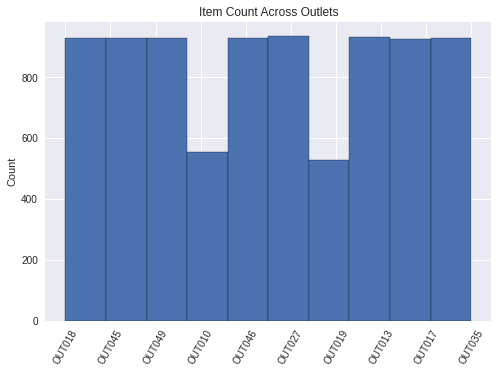

In [83]:
#1. Histogram to view the distributions of various feature in your dataset

#Viewing distribution of quantity of items carried across individual outlets
plt.style.use('seaborn')
df['Outlet_Identifier'].hist(bins=10, edgecolor = "black")
plt.xticks(rotation = 60)
plt.title("Item Count Across Outlets")
plt.ylabel('Count');

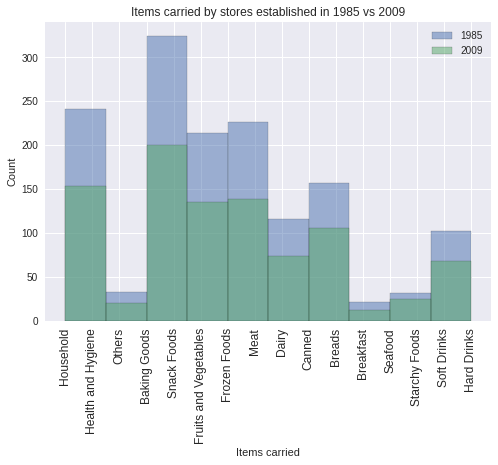

In [76]:
#Comparing distributions of item types in stores established in 1985 and 2009
year1985_filter = df["Outlet_Establishment_Year"] == 1985
year2009_filter = df["Outlet_Establishment_Year"] == 2009

plt.hist(df[year1985_filter]['Item_Type'], alpha=0.5, edgecolor="black", label="1985")
plt.hist(df[year2009_filter]['Item_Type'], alpha=0.5, edgecolor="black", label="2009")
plt.title('Items carried by stores established in 1985 vs 2009')
plt.xlabel('Items carried')
plt.ylabel('Count')
plt.legend()
plt.xticks(fontsize=12, rotation = 90);

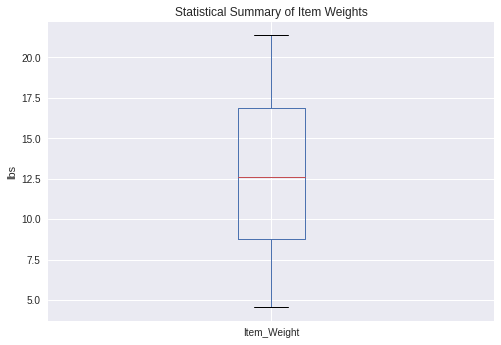

In [64]:
#2. Boxplot to view statistical summaries of various features in your dataset.
#Viewing boxplot of weight of items in the dataset
df.boxplot(['Item_Weight'])
plt.title('Statistical Summary of Item Weights')
plt.ylabel('lbs');

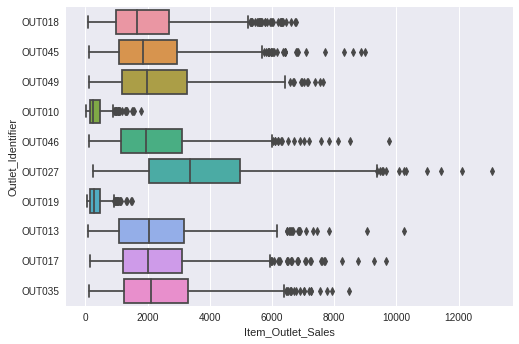

In [65]:
#Viewing statistical summaries of item outlet sales by inidividual outlets

sns.boxplot(x=df["Item_Outlet_Sales"], y=df["Outlet_Identifier"]);

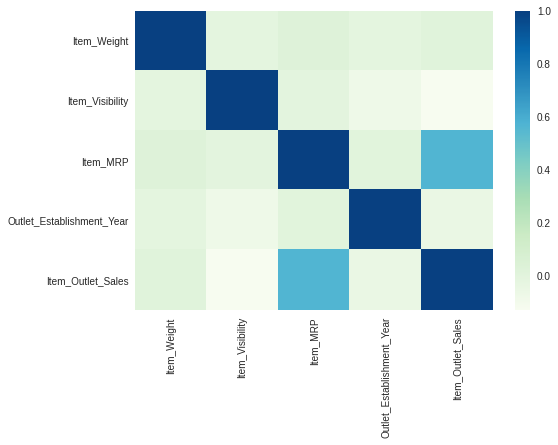

In [81]:
#3. Heatmap of the correlation between features

corr = df.corr()

sns.heatmap(corr, cmap="GnBu");